In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-02-28 08:06'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})

In [5]:
df_latest

,datetime,headline
0,2020-02-28 08:06,Trump says coronavirus will 'disappear' eventu...
1,2020-02-28 08:06,Coronavirus Live Updates: W.H.O. Warns Outbrea...
2,2020-02-28 08:06,U.S. workers without protective gear assisted ...
3,2020-02-28 08:06,De Blasio’s New Side Hustle: Trolling Bloomber...
4,2020-02-28 08:06,Pence tells 'Hannity' risk of coronavirus spre...
5,2020-02-28 08:06,Trump Holds Press Conference On Coronavirus | ...
6,2020-02-28 08:06,"Body, casket recovered after stolen hearse cra..."
7,2020-02-28 08:06,Dramatic rescues unfold after water main break...
8,2020-02-28 08:06,Trump tells black history event he deserves '1...
9,2020-02-28 08:06,San Francisco police arrest suspect in filmed ...


In [6]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [7]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [8]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [9]:
# is_virus is 1 if there is reference to coronavirus
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if ('coronavirus' in v.lower()) or ('covid-19' in v.lower())
           else 0)
)

In [10]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [11]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
17,Markets head for worst week since 2008 as coro...
25,South Korean boy band BTS cancels some concert...
34,"Will Northern California schools close, cancel..."
36,"Coronavirus spreads faster outside China, stok..."
37,CDC: A clean shave lowers coronavirus chances ...


In [12]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [13]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-02-28 08:06:00,2020-02-28 08:06,South Korean boy band BTS cancels some concert...,1,105
2020-02-28 08:06:00,2020-02-28 08:06,NFL Scouting Combine Notebook: Is Henry Ruggs ...,0,105
2020-02-28 08:06:00,2020-02-28 08:06,"Will Northern California schools close, cancel...",1,106


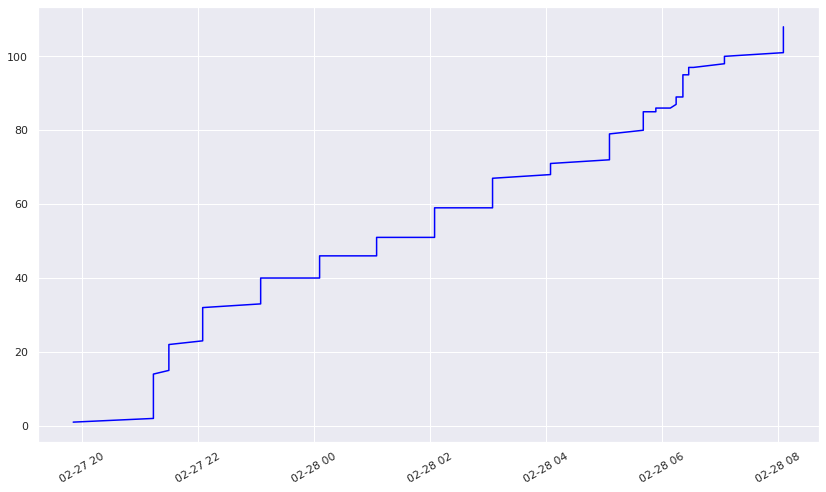

In [14]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [15]:
fig.savefig(png_file)
